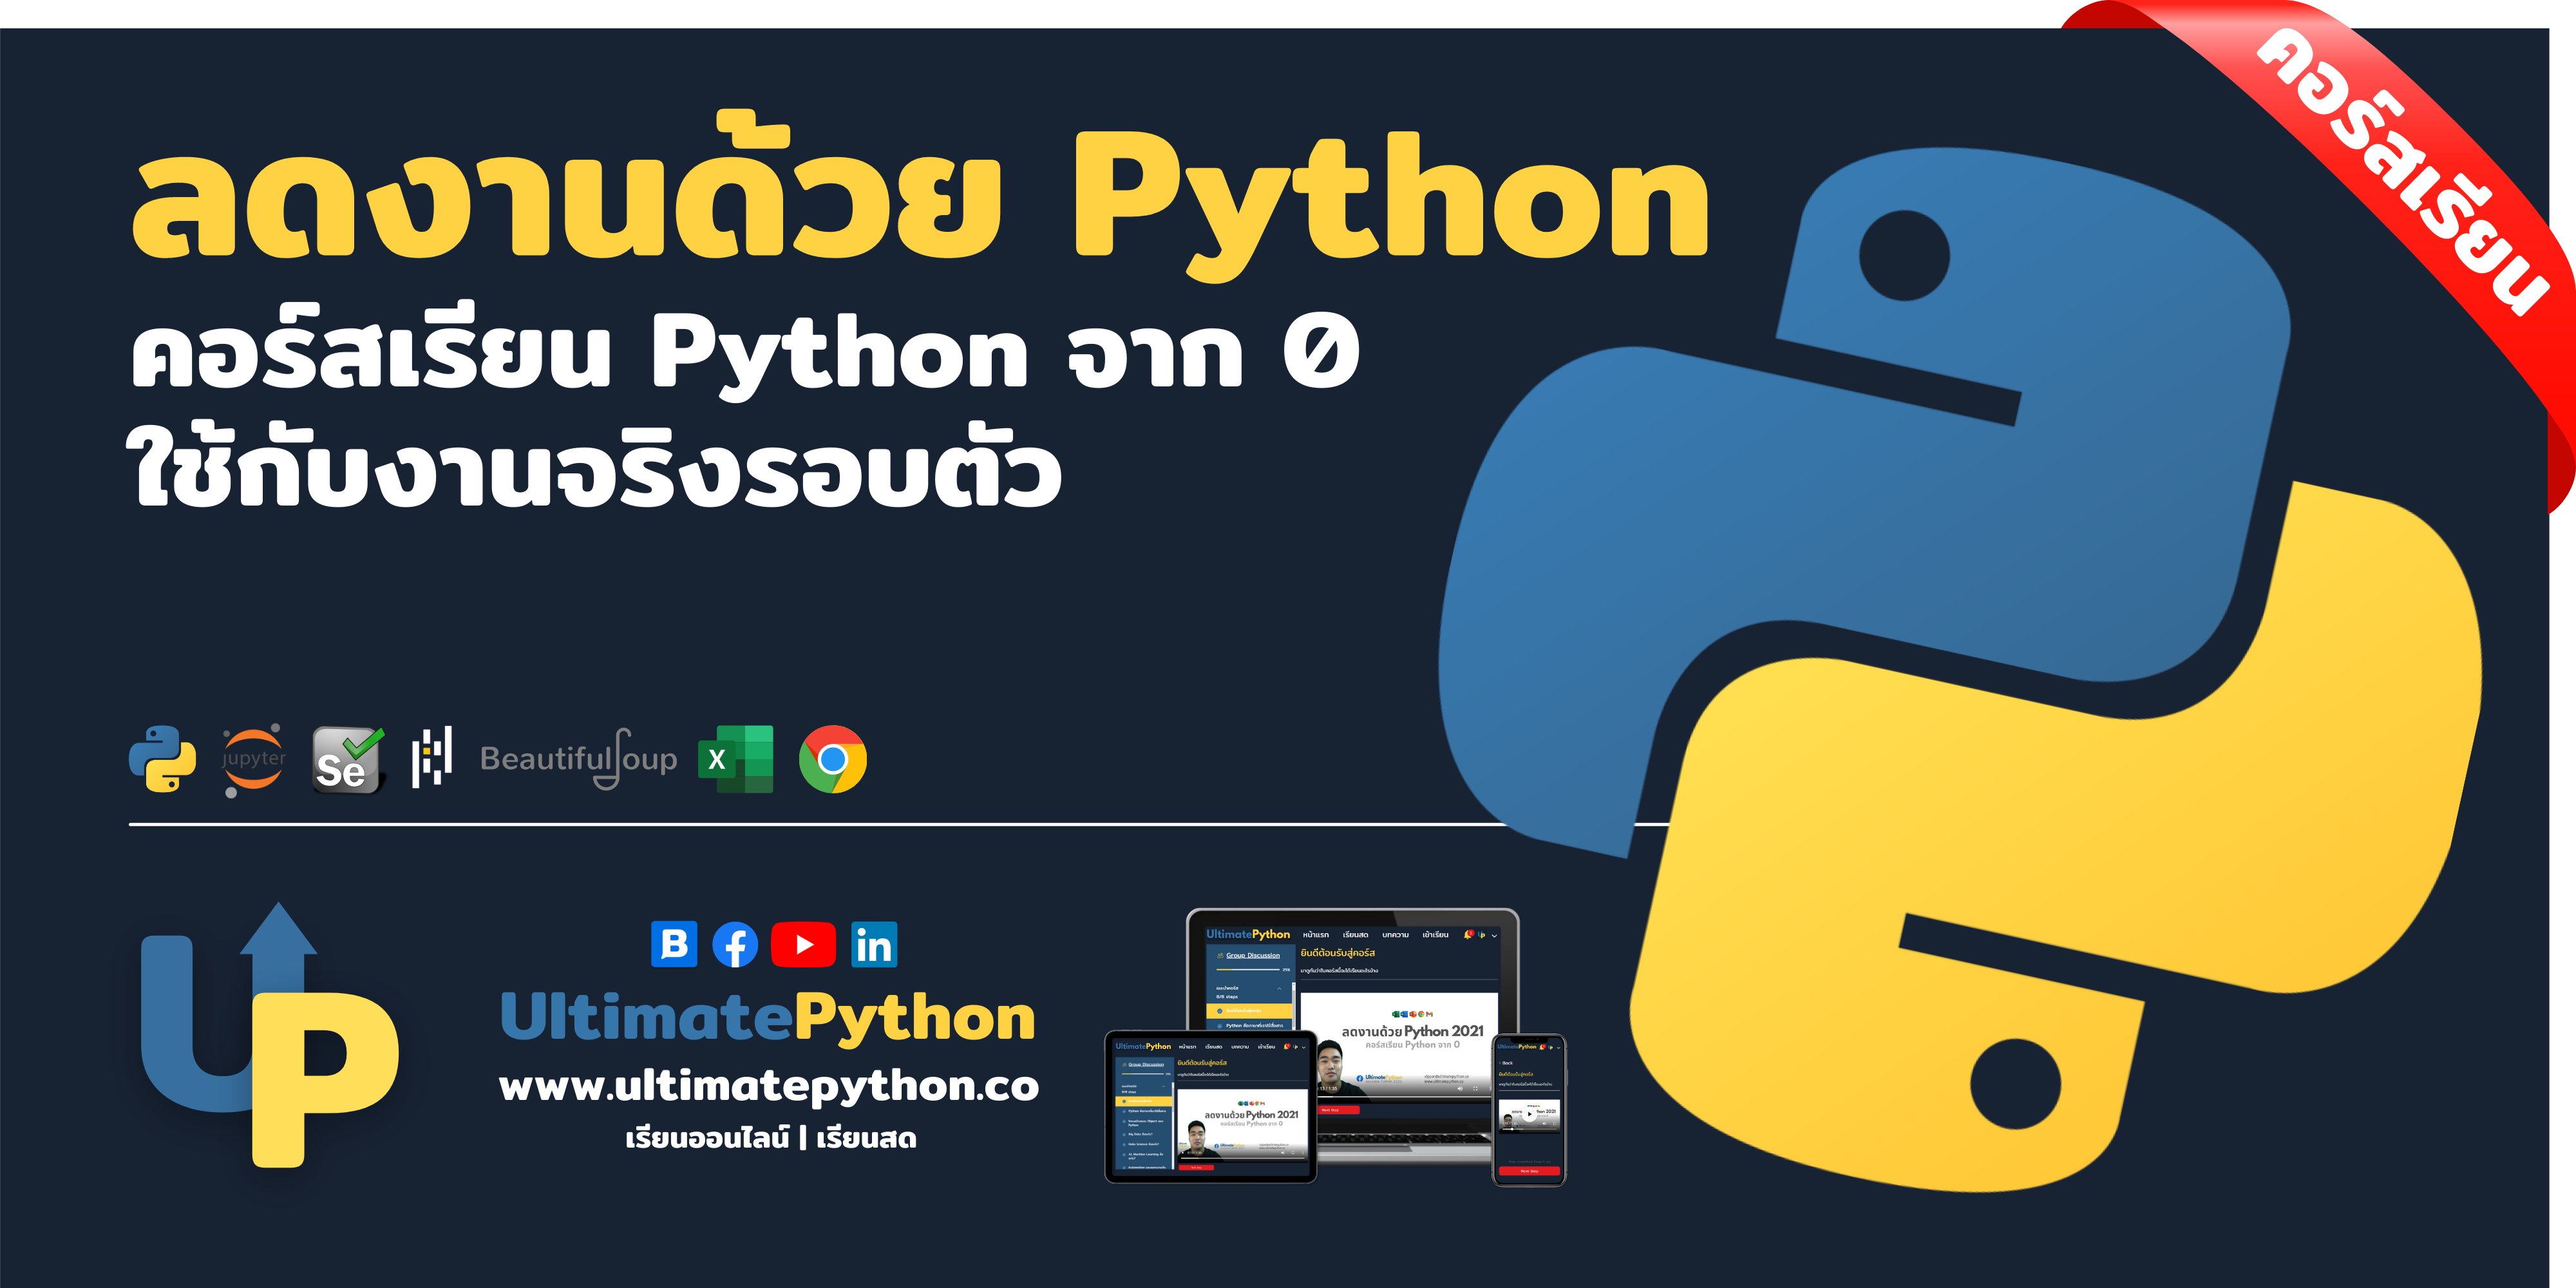

## Face Dectection

การตรวจจับใบหน้าเป็นเทคนิคในสาขา computer vision ที่เน้นการพัฒนาโปรแกรมให้สามารถทำความเข้าใจ "ข้อมูล" ที่อยู่ในรูปภาพ โดยอาศัยการตรวจจับ classifier ที่เป็นส่วนย่อยของใบหน้า ที่อาจมีมากถึง 6000++ classifier ที่ใช้ระบุใบหน้าบุคคล

## Haar Cascades

เป็น Object Detection Algorithm ใช้ในการตรวจจับวัตถุแบบ real-time อ้างอิงจากงานวิจัยของ Paul Viola และ Michael Jones ชื่อ “Rapid Object Detection using a Boosted Cascade of Simple Features” published in 2001

โดยหลักการทำงานของ Haar Cascades จะอ่านข้อมูล pixel ของรูป และนำมาเปรียบเทียบกับ feature ที่มีอยู่บนใบหน้าซึ่ง Haar Cascades สามารถปรับแต่งเพื่อตรวจจับวัตถุได้หลายอย่าง และเก็บข้อมูลในการตรวจ และโปรแกรมที่ถูกปรับแต่งเพื่อค้นหาวัตถุต่างๆ เก็บไว้ในรูปของไฟล์ xml ซึ่งหากเราต้องการตรวจจับใบหน้า เราต้องนำไฟล์ cascades ที่ปรับแต่งสำหรับการจับใบหน้านั่นเอง

[เรียนรู้เพิ่มเติม](https://medium.com/analytics-vidhya/haar-cascades-explained-38210e57970d)

## ข้อมูลที่ใช้

เราจะใช้รูปที่มีใบหน้าคนอยู่ และไฟล์ xml ที่เก็บข้อมูล haar cascades ที่ใช้เพื่อระบุใบหน้า

#### ไฟล์รูป

รูป ig-cover-1.png

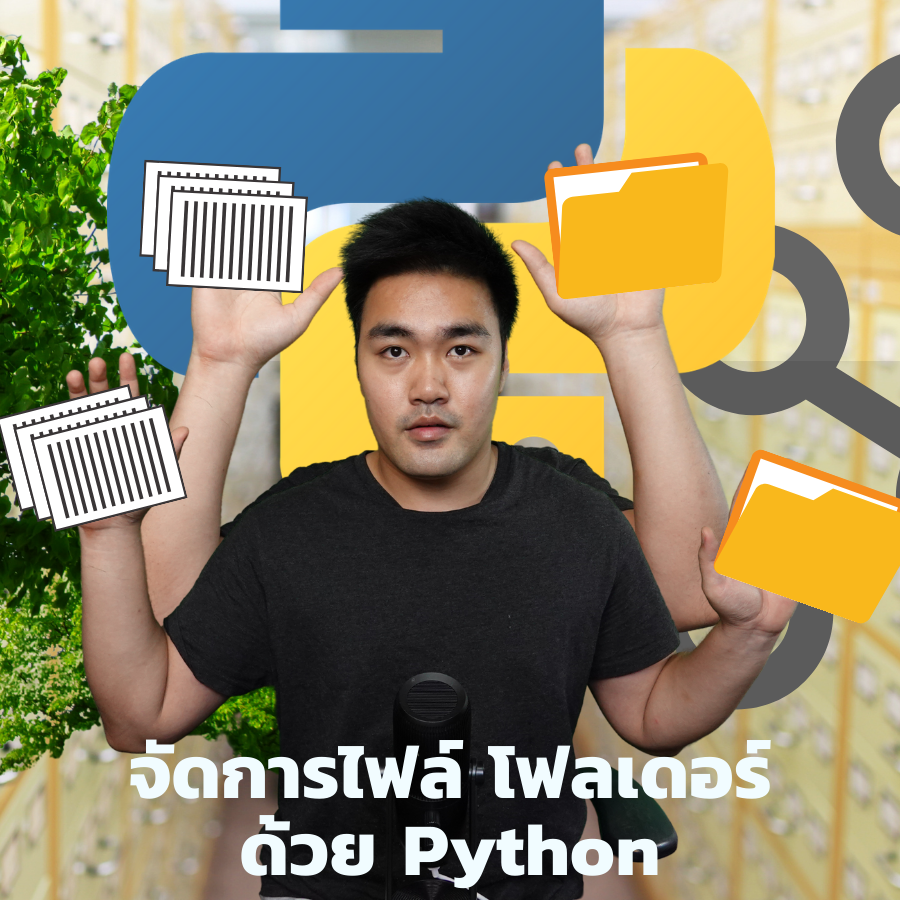

#### ไฟล์ cascade

สำหรับโปรแกรมที่ใช้ตรวจจับเราจะใช้โปรแกรมที่ทำสำเร็จไว้แล้วชื่อ haarcascade_frontalface_default.xml ที่เตรียมไว้ให้เรียบร้อย

In [1]:
imagePath = r'ig-cover-1.png'
cascPath = "haarcascade_frontalface_default.xml"

## เปิดใช้ haar cascades

#### เครื่องมือที่ต้องใช้

library ที่ชื่อ opencv ที่รวบรวมเครื่องมือการทำงานกับภาพ ซึ่งเป็นเครื่องมือพื้นฐานและสำคัญที่สุด library หนึ่ง โดยการติดตั้ง opencv ใช้วิธีการดาวน์โหลด opencv จากเวปไซต์ ดูวิธีการติดตั้งได้จากลิ้งค์ด้านล่าง

[คู่มือการติดตั้ง opencv (หรือ cv2)](https://docs.opencv.org/master/da/df6/tutorial_py_table_of_contents_setup.html)

[สำหรับ mac](https://docs.opencv.org/master/d0/db2/tutorial_macos_install.html)

#### นำเข้า opencv

ซึ่งใช้ชื่อว่า cv2 ในการนำเข้า

In [2]:
import cv2

#### การเปิดใช้

เราใช้คำสั่ง cv2.CascadeClassifier() ที่รับ path ไฟล์ของไฟล์ xml ที่เก็บ haar cascades ที่ใช้ระบุใบหน้า

In [3]:
faceCascade = cv2.CascadeClassifier(cascPath)

## ข้อมูลจากรูป

#### นำเข้าข้อมูล

เราจะนำเข้าข้อมูลผ่านคำสั่ง cv2.imread() ที่รับ path ไฟล์รูป

In [4]:
image = cv2.imread(imagePath)

#### แปลงรูปเป็นขาวดำ

ในกรณีนี้ cascade ของเราทำงานกับไฟล์รูปขาวดำ ซึ่งค่อนข้างปกติในการใช้กับโปรแกรมตรวจจับวัตถุ

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## ใช้ haar cascade ตรวจจับใบหน้า

โดยใช้คำสั่ง .detectMultiScale() ที่ทำงานร่วมกับข้อมูลที่ได้จากการเปิด cascade ด้วยคำสั่ง .CascadeClassifier() และรับข้อมูลรูปขาวดำ ซึ่งเราจะได้ตำแหน่งของใบหน้าที่ตรวจเจอมาอยู่ใน array ของ array

In [6]:
faces = faceCascade.detectMultiScale(gray)

### ข้อมูลที่ได้

เราจะได้ตำแหน่งของใบหน้าที่ตรวจเจอโดยการระบุ ตำแหน่ง x, ตำแหน่ง y, ความกว้าง, ความสูงของ "กรอบ" ที่ใช้ระบุตำแหน่งใบหน้า

In [7]:
faces

array([[332, 272, 193, 193]], dtype=int32)

In [8]:
x, y, w, h = faces[0]

## ตีกรอบใบหน้าที่เจอ

#### การตีกรอบ

ใช้คำสั่ง cv2.rectangle() ที่รับค่า ภาพที่ต้องการตีกรอบ, tuple จุดเริ่มต้นที่จุดซ้ายบน (x,y),  tuple จุดสิ้นสุดที่จุดขวาล่าง หรือ (x+w,y+h), tuple ค่าสี BGR สีเขียวใช้ (0,255,0), และความหนาของกรอบที่ต้องการ

In [9]:
cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

array([[[228, 240, 243],
        [230, 242, 244],
        [230, 242, 244],
        ...,
        [189, 227, 236],
        [189, 226, 236],
        [189, 226, 235]],

       [[229, 241, 243],
        [230, 242, 244],
        [230, 242, 244],
        ...,
        [190, 226, 236],
        [191, 227, 237],
        [192, 226, 236]],

       [[229, 241, 243],
        [230, 242, 244],
        [230, 242, 244],
        ...,
        [190, 226, 236],
        [191, 227, 237],
        [192, 226, 236]],

       ...,

       [[124, 164, 171],
        [123, 163, 167],
        [121, 161, 166],
        ...,
        [122, 183, 192],
        [123, 182, 191],
        [121, 182, 191]],

       [[126, 166, 173],
        [124, 165, 172],
        [123, 162, 172],
        ...,
        [125, 184, 192],
        [124, 183, 192],
        [123, 182, 191]],

       [[129, 171, 175],
        [127, 170, 172],
        [126, 167, 175],
        ...,
        [127, 186, 192],
        [126, 184, 192],
        [126, 182, 192]]

## การแสดงผลลัพธ์

ใช้คำสั่ง cv2.imshow() ที่รับค่า string ที่ใช้ตั้งชื่อหน้าต่างที่ใช้แสดงผลรูป และรับค่ารูปภาพที่ต้องการแสดง (รูปภาพที่ผ่านการตีกรอบ) ซึ่งการใช้งาน cv2.imshow() โดยจะต้องใช้คำสั่ง cv2.waitKey(0) ตามเข้าไปเพื่อป้องกันโปรแกรม crash

In [10]:
cv2.imshow("Faces found", image)
cv2.waitKey(0) 

-1

## การค้นหาหลายใบหน้า

เราสามารถใช้ชุดคำสั่งเดียวกันเพื่อค้นหาใบหน้าหลายคนได้ในรูปเดียวกัน เนื่องจาก cv2.CascadeClassifier() จะค้นหาใบหน้าทุกคนในรูป แต่ในการแสดงผล เราจะต้องนำตำแหน่งของทุกใบหน้ามาตีกรอบ โดยการใช้ for loop

#### ไฟล์รูป

faces.png ที่จะใช้เพื่อทดลองค้นหาใบหน้าหลายคน

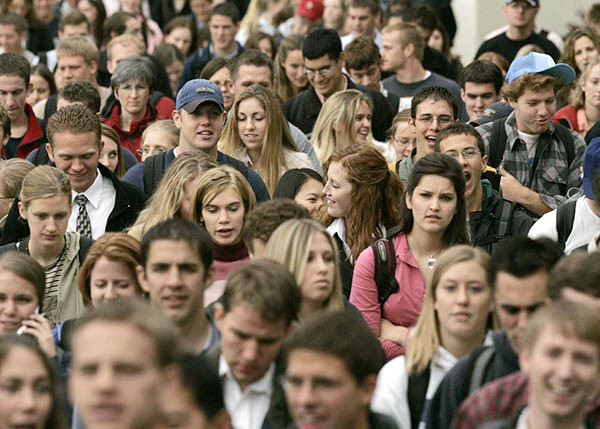

In [11]:
imagePath = r'faces.jpg'
cascPath = "haarcascade_frontalface_default.xml"

image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faceCascade = cv2.CascadeClassifier(cascPath)
faces = faceCascade.detectMultiScale(gray)

print(f'There are {len(faces)} faces found.')

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imshow("Faces found", image)
cv2.waitKey(0) 

There are 22 faces found.


-1

## เสร็จสิ้นตรวจจับใบหน้า ด้วยโค้ด 11 บรรทัด

### [เข้ากลุ่มแลกเปลี่ยนความรู้](https://www.facebook.com/groups/664940094107034)

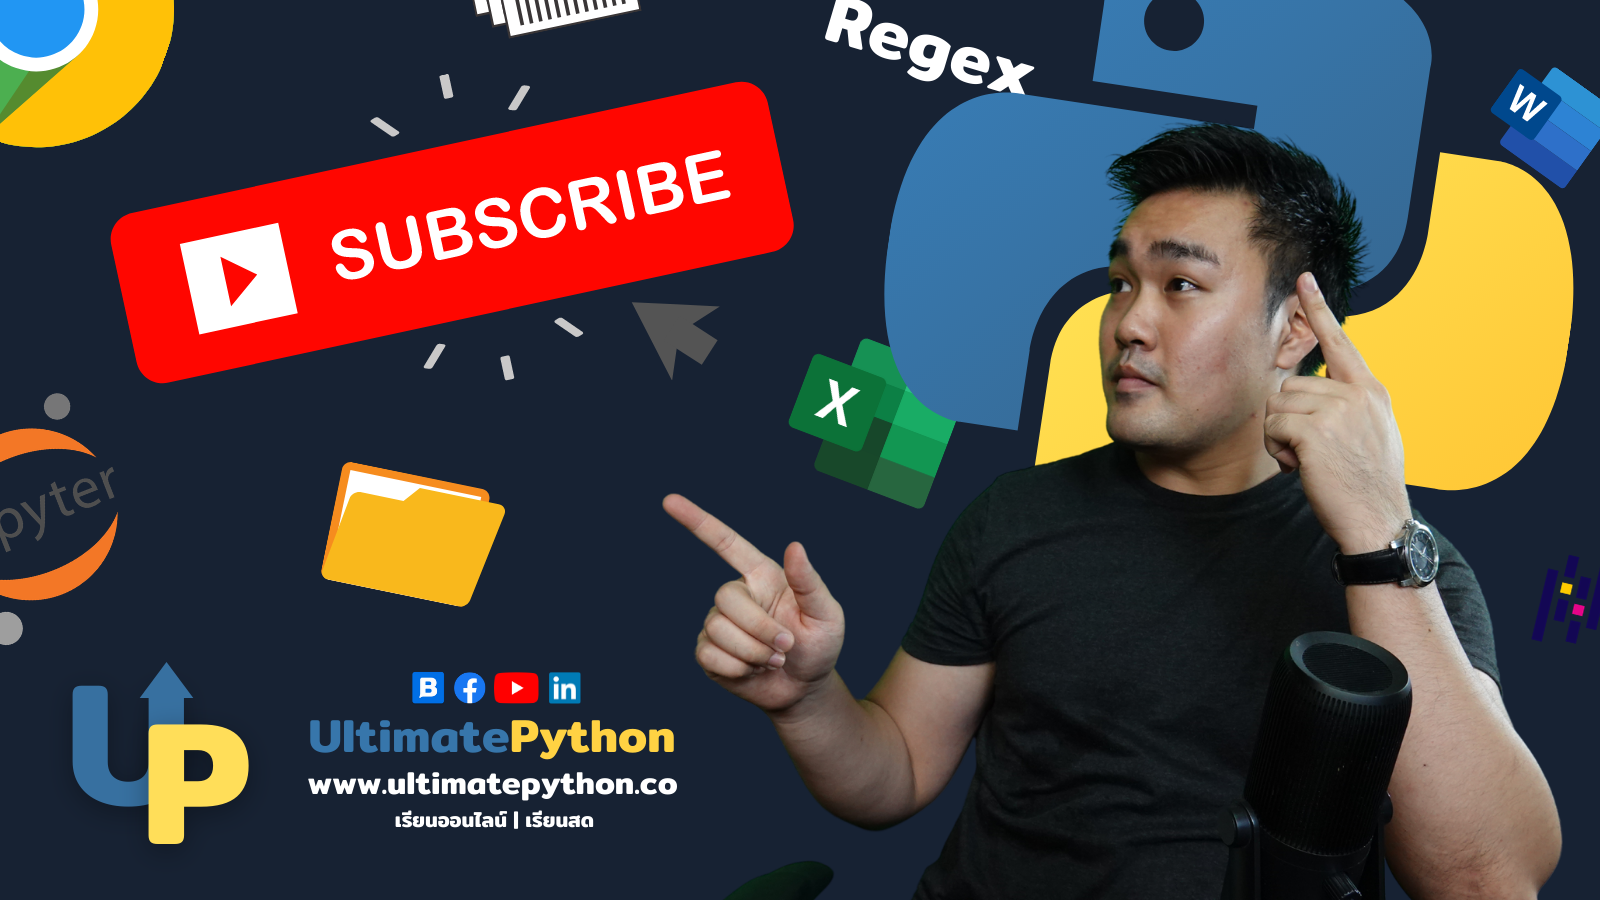